In [1]:
import pandas as pd
import numpy as np
import os
import pylab
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# from minepy import MINE
%matplotlib inline

In [2]:
# 计算合在一起的相关性
type_name_list= ["YRB-M", "YRB-U", "HRB-M", "HRB-U"]
count = 0
for cor_type in ["cc"]:
    
    data_list = []
    for region in ["yichang", "ziya"]:
        figure_path = ""
        for test in ["a", "c"]:
            data_name = test + "_train_results.csv"
            region_path = os.path.join("../test_2", region)
            data_path = os.path.join(region_path, data_name)

            mic_file_name = "relation_" + region + "_mean_" + test + "_7.csv"
            
            mic_path = os.path.join("../relation_data", mic_file_name)

            type_name = type_name_list[count]
            count += 1
            
            raw_data = pd.read_csv(data_path)
            raw_data = raw_data.drop(raw_data[raw_data["test_nse"]<0].index)
            
            
            raw_data["type"] = type_name
            data_list.append(raw_data)
    data = pd.concat(data_list, axis=0, ignore_index=True)

In [3]:
data

,hidden_layer_neurons,output,repeat,test_cc,test_fvu,test_mre,test_nse,test_rmse,time_steps,train_fvu,train_mean,train_mre,train_rmse,train_std,valid_cc,valid_fvu,valid_mre,valid_nse,valid_rmse,type
0,20_16_12,WT,1.0,0.844775,0.407139,20.251808,0.619009,4.193236,11.0,0.242256,5.622729,18.002962,3.309590,6.419559,0.861234,0.377755,22.906029,0.637842,4.121124,YRB-M
1,20_16_12,WT,2.0,0.903381,0.223808,14.331327,0.803708,3.009839,11.0,0.190672,5.622729,16.016930,2.934384,6.419559,0.915451,0.195602,15.998753,0.814454,2.949795,YRB-M
2,20_16_12,WT,3.0,0.921228,0.179917,13.295535,0.844694,2.677232,11.0,0.154056,5.622729,14.447909,2.637246,6.419559,0.923252,0.161670,15.525246,0.846556,2.682507,YRB-M
3,20_16_12,WT,4.0,0.902129,0.228331,15.596951,0.809101,2.968204,11.0,0.166668,5.622729,15.146500,2.742874,6.419559,0.901626,0.201230,17.933353,0.810952,2.977506,YRB-M
4,20_16_12,WT,5.0,0.854371,0.409912,25.208698,0.613686,4.222431,11.0,0.231825,5.622729,17.740063,3.238394,6.419559,0.859425,0.370723,27.817842,0.633169,4.147626,YRB-M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29576,8_4_12,CODCR,96.0,0.866932,0.484616,78.375038,0.744162,24.614647,12.0,0.387867,43.710512,80.291214,31.112183,52.785273,0.774748,0.590743,84.722557,0.598760,34.364105,HRB-U
29577,8_4_12,CODCR,97.0,0.890856,0.486294,101.310577,0.758004,23.939537,12.0,0.293277,43.710512,103.278442,26.800459,52.785273,0.792101,0.515633,109.071747,0.623765,33.276112,HRB-U
29578,8_4_12,CODCR,98.0,0.901338,0.327627,73.168510,0.809013,21.267368,12.0,0.255402,43.710512,65.832909,25.229536,52.785273,0.804583,0.425522,76.998856,0.632160,32.902782,HRB-U
29579,8_4_12,CODCR,99.0,0.891390,0.693833,135.235641,0.754650,24.104851,12.0,0.312075,43.710512,83.147339,27.711605,52.785273,0.792629,0.586706,143.244263,0.610202,33.870586,HRB-U


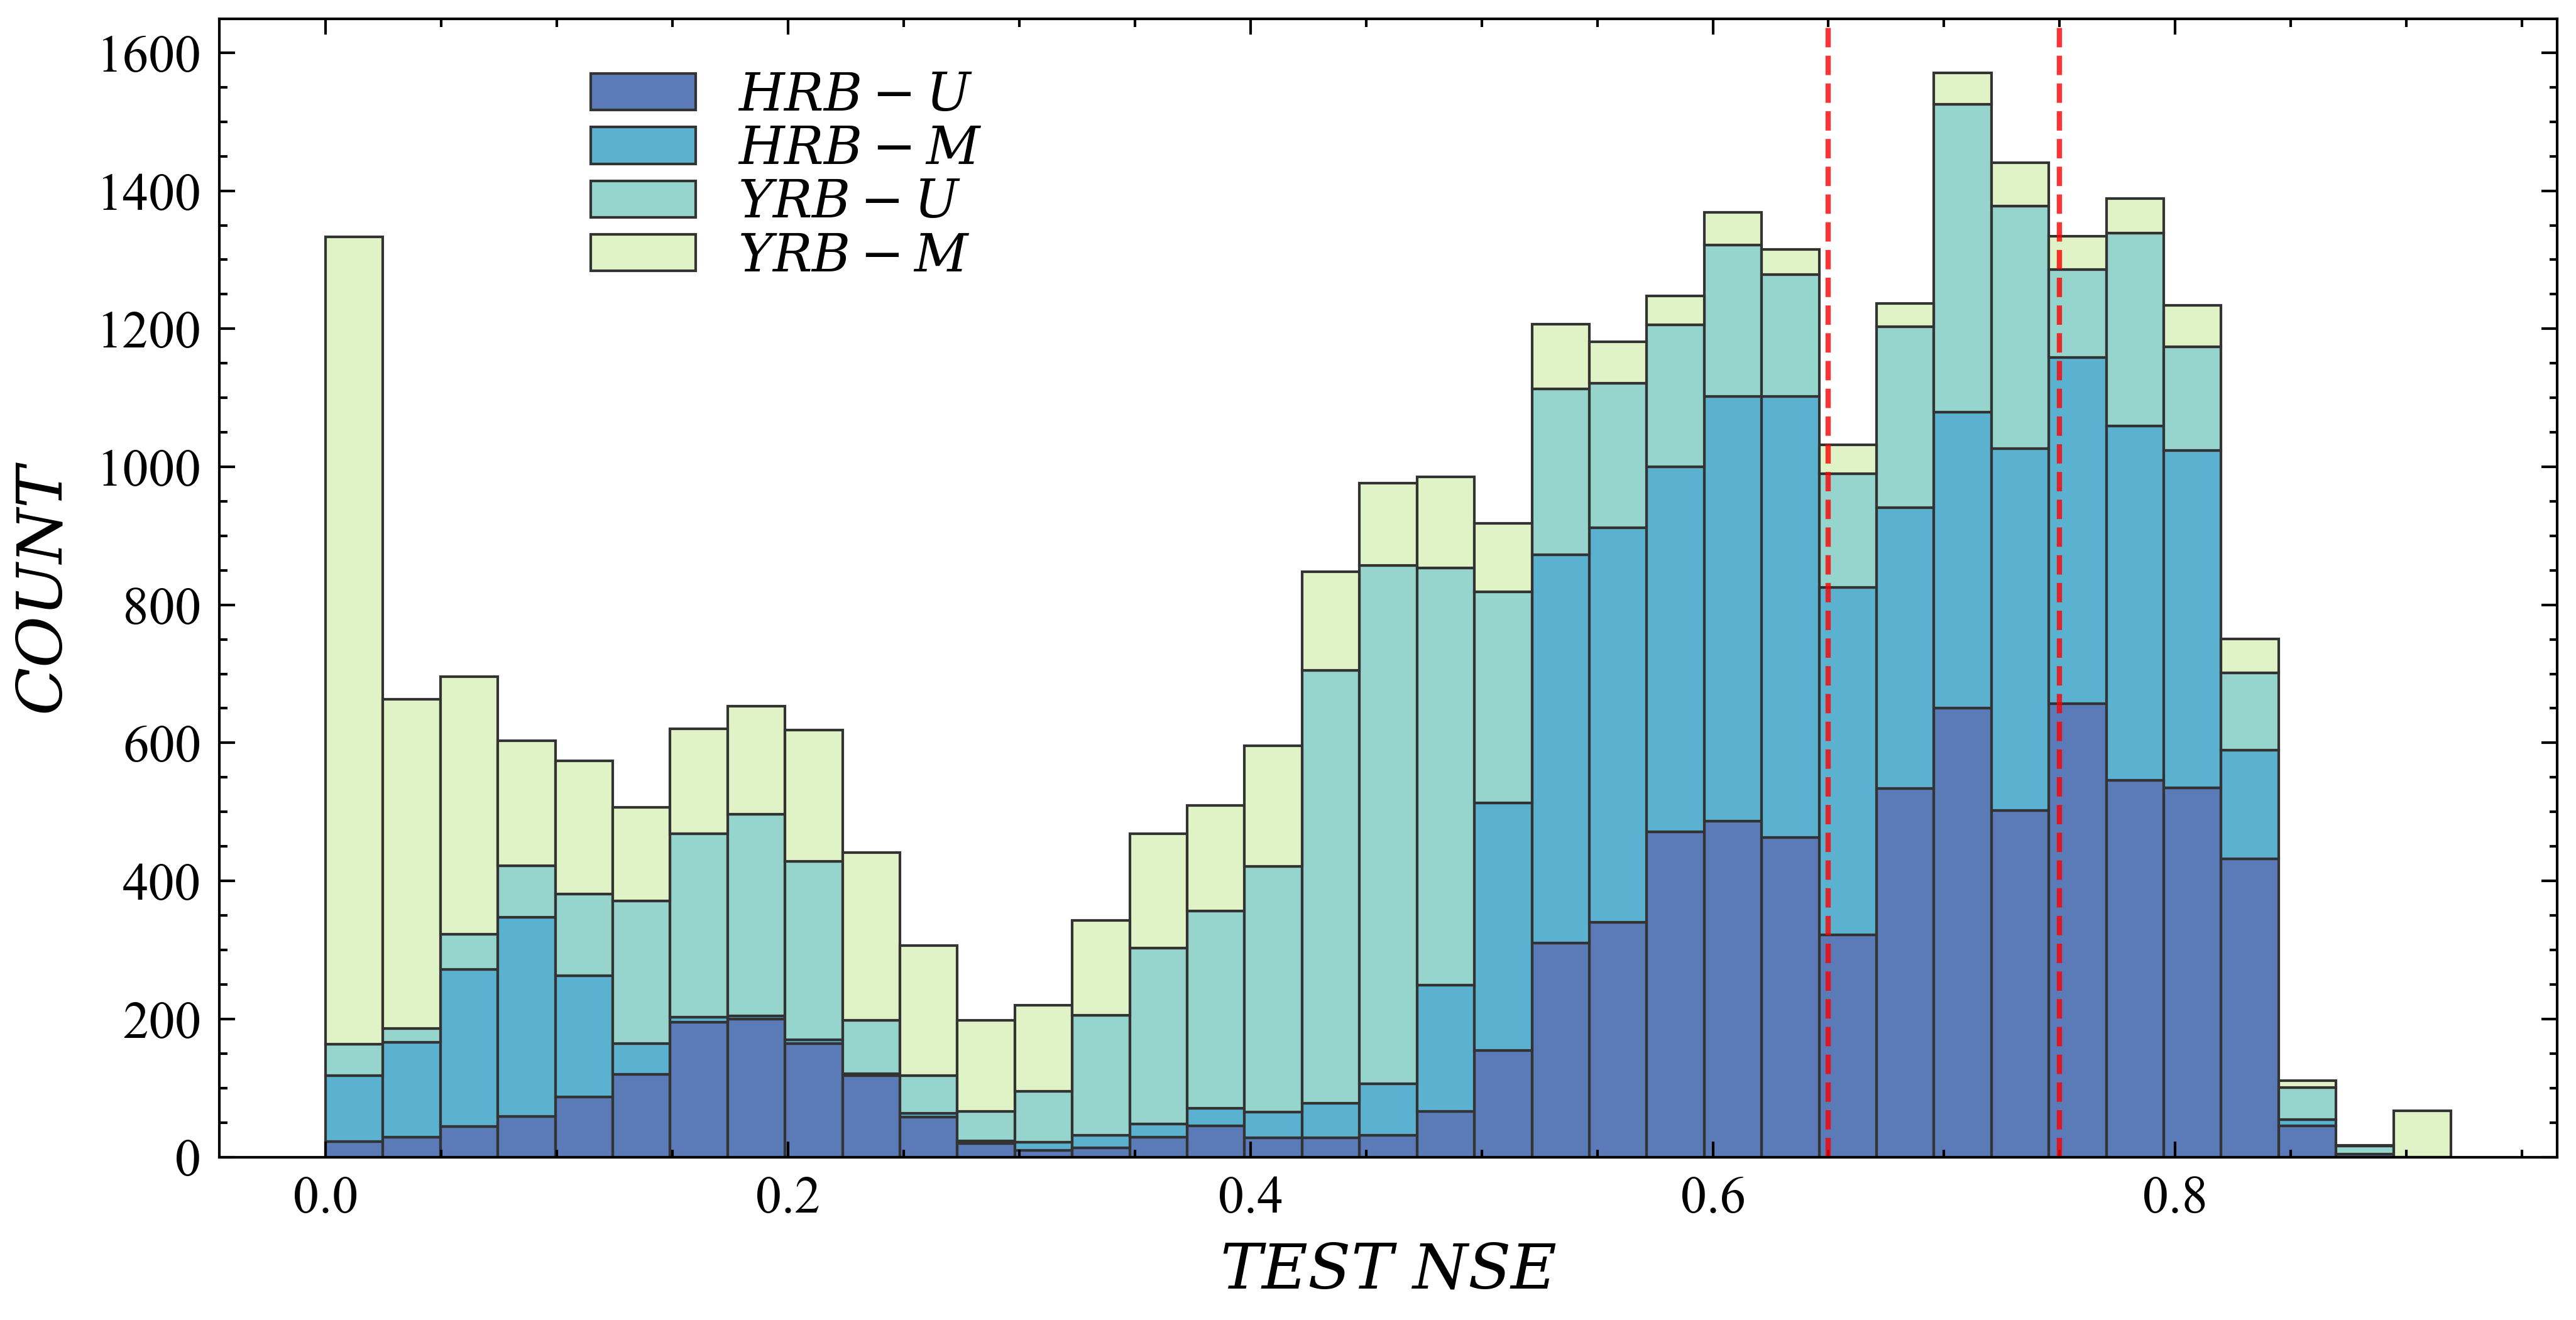

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#### !!!!!!!!!!!!!!!!!!!! seaborn version = 0.11.1

with plt.style.context(['science','no-latex', 'ieee']):
    f, ax = plt.subplots(figsize=(8, 4))
    
    plt.rc('font', family='Times New Roman')
        
    plt.rcParams["font.size"] = 10
    
    axis = sns.histplot(
        data,
        x="test_nse", hue="type",
        hue_order=["YRB-M", "YRB-U", "HRB-M", "HRB-U"],
        multiple="stack",
        palette="YlGnBu",
        edgecolor=".2",
        linewidth=.5,
        ax=ax
    )
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    plt.xlabel("$TEST\ NSE$", size = 12)
    plt.ylabel("$COUNT$", size = 12)

    plt.xticks(fontproperties = 'Times New Roman', size = 10)
    plt.yticks(fontproperties = 'Times New Roman', size = 10)



    labels_0 = ["$YRB-M$", "$YRB-U$", "$HRB-M$", "$HRB-U$"][::-1]
    ax.legend(labels=labels_0, labelspacing=0.1, fontsize=10,loc=(0.15, 0.75))
    plt.axvline(x=0.65, color = "red", alpha=0.8, linestyle = "dashed")
    plt.axvline(x=0.75, color = "red", alpha=0.8, linestyle = "dashed")
    plt.show()
#     plt.savefig("stack_hist_plot.jpg", dpi=1000, bbox_inches="tight")